In [1]:
import numpy as np
import pandas as pd
#from pandas import DataFrame

import matplotlib

import pickle
import palettable
from scipy.sparse import csr_matrix, vstack
from scipy.optimize import curve_fit
import sys 
from netCDF4 import num2date, date2num
import xarray as xr
from netCDF4 import Dataset

sys.path.append('../../')

from climada.engine import Impact
from climada.entity import Exposures
from climada.hazard import Hazard

from src.impact_calculation.impact_heat import *
from src.util.plots import *

fig_dir = '../../data_analysis/figures/'

2020-12-04 16:31:11,957 - climada - DEBUG - Loading default config file: /Users/zeliestalhanske/Documents/GitHub/climada_python/climada/conf/defaults.conf


## Damage cost for each scenario, year and labor type

In [2]:
pickle_in = \
open('/Users/zeliestalhanske/Documents/GitHub/master_thesis/output/impact_ch/impacts_all_branches_1000mc_all_uncertainties_CH.pickle','rb')
loss_productivity = pickle.load(pickle_in)  
pickle_in = \
open('/Users/zeliestalhanske/Documents/GitHub/master_thesis/output/impact_ch/matrix_all_branches_1000mc_all_uncertainties_CH.pickle','rb')
matrices_productivity = pickle.load(pickle_in) 
scenarios = ['RCP26', 'RCP45', 'RCP85']
years = ['2020','2035','2050']
n_mc=1000
impact_productivity = ImpactsHeatProductivity(scenarios, years, n_mc)
impact_productivity.agg_impacts_mc = loss_productivity
impact_productivity.median_impact_matrices = matrices_productivity 


In [38]:
pickle_in = \
open('/Users/zeliestalhanske/Documents/GitHub/master_thesis/output/impact_ch/loss_all_branches_99mc_all_uncertainties_CH.pickle','rb')
loss_productivity = pickle.load(pickle_in)  
pickle_in = \
open('/Users/zeliestalhanske/Documents/GitHub/master_thesis/output/impact_ch/matrix_all_branches_99mc_all_uncertainties_CH.pickle','rb')
matrices_productivity = pickle.load(pickle_in) 
scenarios = ['RCP26', 'RCP45', 'RCP85']
years = ['2035','2050','2065']
n_mc=99
impact_productivity = ImpactsHeatProductivity(scenarios, years, n_mc)
impact_productivity.agg_impacts_mc = loss_productivity
impact_productivity.median_impact_matrices = matrices_productivity 

In [4]:
exposures = {}
exposures['outside high physical activity'] = Exposures()
exposures['outside high physical activity'].read_hdf5('../../input_data/exposures/exposures_productivity_ch_OH.h5')
exposures['outside high physical activity']['value'] = exposures['outside high physical activity']['value']*8*52*5

exposures['inside low physical activity'] = Exposures()
exposures['inside low physical activity'].read_hdf5('../../input_data/exposures/exposures_productivity_ch_IL.h5')
exposures['inside low physical activity']['value'] = exposures['inside low physical activity']['value']*8*52*5

exposures['inside moderate physical activity'] = Exposures()
exposures['inside moderate physical activity'].read_hdf5('../../input_data/exposures/exposures_productivity_ch_IM.h5')
exposures['inside moderate physical activity']['value'] = exposures['inside moderate physical activity']['value']*8*52*5

exposures['outside moderate physical activity'] = Exposures()
exposures['outside moderate physical activity'].read_hdf5('../../input_data/exposures/exposures_productivity_ch_OM.h5')
exposures['outside moderate physical activity']['value'] = exposures['outside moderate physical activity']['value']*8*52*5


2020-12-04 16:31:31,087 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_productivity_ch_OH.h5
2020-12-04 16:31:32,462 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_productivity_ch_IL.h5
2020-12-04 16:31:33,696 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_productivity_ch_IM.h5
2020-12-04 16:31:35,020 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_productivity_ch_OM.h5


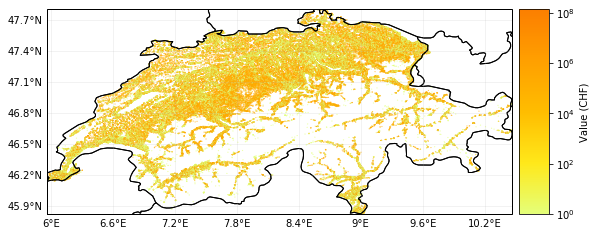

In [3]:
exposures['outside high physical activity'].value_unit = 'CHF'
exposures['outside high physical activity'].plot_hexbin(pop_name=False, norm=matplotlib.colors.LogNorm())

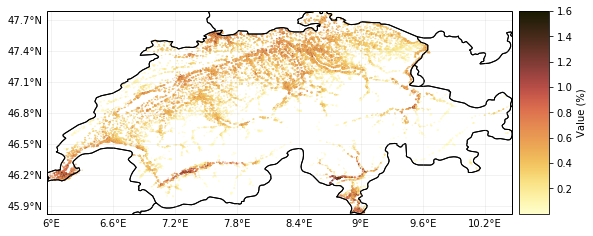

In [42]:
impact_high = impact_productivity.matrix_as_impact(impact_productivity.median_impact_matrices['RCP85']['2050']['outside high physical activity'],
                                                            exposures['outside high physical activity'], percentage=True, unit='%')
cm = palettable.scientific.sequential.LaJolla_20.mpl_colormap

impact_high.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, vmax=1.6)

In [41]:
impact_productivity.median_impact_matrices

{'RCP26': {'2035': {'inside low physical activity': <1x216100 sparse matrix of type '<class 'numpy.float64'>'
   	with 123614 stored elements in Compressed Sparse Row format>,
   'outside high physical activity': <1x216100 sparse matrix of type '<class 'numpy.float64'>'
   	with 50824 stored elements in Compressed Sparse Row format>,
   'inside moderate physical activity': <1x216100 sparse matrix of type '<class 'numpy.float64'>'
   	with 60625 stored elements in Compressed Sparse Row format>,
   'outside moderate physical activity': <1x216100 sparse matrix of type '<class 'numpy.float64'>'
   	with 12154 stored elements in Compressed Sparse Row format>},
  '2050': {'inside low physical activity': <1x216100 sparse matrix of type '<class 'numpy.float64'>'
   	with 123634 stored elements in Compressed Sparse Row format>,
   'outside high physical activity': <1x216100 sparse matrix of type '<class 'numpy.float64'>'
   	with 50834 stored elements in Compressed Sparse Row format>,
   'insid

In [44]:
categories = {'inside low physical activity': 'IL', 'inside moderate physical activity': 'IM',
                           'outside moderate physical activity': 'OM', 'outside high physical activity': 'OH'}
relative_matrices = impact_productivity.get_relative_change_matrices('2020', categories)

KeyError: 2020

In [14]:
relative_matrice_high = impact_productivity.matrix_as_impact(relative_matrices['RCP85']['2050']['outside high physical activity'],
                                                            exposures['outside high physical activity'], percentage=False, unit='%')


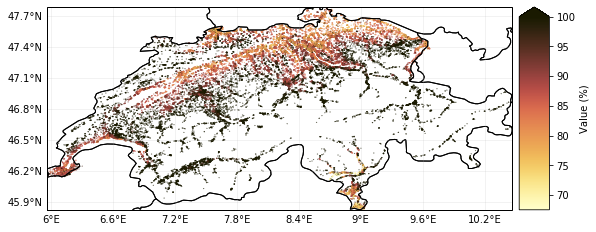

In [15]:
relative_matrice_high.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, vmax=100, extend='max')

In [32]:
pickle_in = \
open('/Users/zeliestalhanske/Documents/GitHub/master_thesis/output/impact_ch/impacts_all_branches_1000mc_all_uncertainties_CH_2065.pickle','rb')
loss_productivity_2065 = pickle.load(pickle_in) 
scenarios = ['RCP26', 'RCP45', 'RCP85']
years = ['2065']
n_mc=1000
impact_productivity_2065 = ImpactsHeatProductivity(scenarios, years, n_mc)
impact_productivity_2065.agg_impacts_mc = loss_productivity_2065

impact_productivity.append_years(impact_productivity_2065)

In [31]:
pickle_in = \
open('/Users/zeliestalhanske/Documents/GitHub/master_thesis/output/impact_ch/impacts_all_branches_100mc_all_uncertainties_CH_2080.pickle','rb')
loss_productivity_2080 = pickle.load(pickle_in) 
scenarios = ['RCP26', 'RCP45', 'RCP85']
years = ['2080']
n_mc=1000
impact_productivity_2080 = ImpactsHeatProductivity(scenarios, years, n_mc)
impact_productivity_2080.agg_impacts_mc = loss_productivity_2080
impact_productivity.append_years(impact_productivity_2080)

In [11]:
(impact_productivity.agg_impacts_mc['RCP85']['2080'].median(axis=0).sum()-impact_productivity.agg_impacts_mc['RCP26']['2080'].median(axis=0).sum())/impact_productivity.agg_impacts_mc['RCP85']['2080'].median(axis=0).sum()


0.5543568151788486

In [32]:
impact_productivity.costs_in_millions()


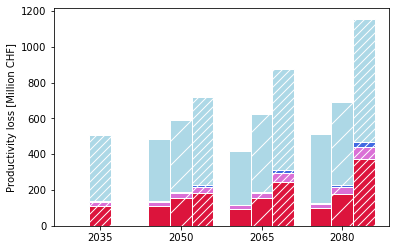

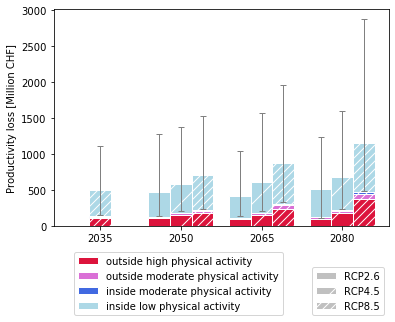

In [33]:
plot_impacts_heat(impact_productivity.agg_impacts_mc, 'Productivity loss [Million CHF]', impact_type='productivity', color=['crimson','orchid','royalblue','lightblue'], save=True)


In [25]:
print(np.sum(impact_productivity.agg_impacts_mc['RCP85']['2050'].quantile(0.05))/1000000)
print(np.sum(impact_productivity.agg_impacts_mc['RCP85']['2050'].median()))


132.04153141816835
463555654.0806911


In [16]:
print((np.sum(impact_productivity.agg_impacts_mc['RCP85']['2050'].quantile(0.95))/(np.sum(impact_productivity.agg_impacts_mc['RCP85']['2050'].quantile(0.5)))))


2.907300794758943


In [187]:
il_percent = 100*impact_productivity.agg_impacts_mc['RCP85']['2050']['inside low physical activity'].mean()/(exposures_low.value.sum()/1000000)
oh_percent = 100*impact_productivity.agg_impacts_mc['RCP85']['2050']['outside high physical activity'].mean()/(exposures_high.value.sum()/1000000)
om_percent = 100*impact_productivity.agg_impacts_mc['RCP85']['2050']['outside moderate physical activity'].mean()/(exposures_om.value.sum()/1000000)
im_percent = 100*impact_productivity.agg_impacts_mc['RCP85']['2050']['inside moderate physical activity'].mean()/(exposures_im.value.sum()/1000000)
total_percent = 100*impact_productivity.agg_impacts_mc['RCP85']['2050']['total'].mean()/((exposures_low.value.sum()+exposures_high.value.sum()+exposures_om.value.sum()+exposures_im.value.sum())/1000000)



In [198]:
impact_productivity.agg_impacts_mc['RCP26']['2080']['outside high physical activity'].mean()/impact_productivity.agg_impacts_mc['RCP26']['2080']['total'].mean()



0.25104576829915987

In [19]:
def median_death(impacts, scenario, year, category='all'):
    if category=='all':
        median_death = [np.median(impacts.agg_impacts_mc[scenario][year][cat]) for cat in impacts.agg_impacts_mc[scenario][year]]
    else:    
        median_death = np.median(impacts.agg_impacts_mc[scenario][year][category])
    return median_death

def percentile_death(impacts, scenario, year, percentile, category='all'):
    if category=='all':
        median_death = (np.percentile(impacts.agg_impacts_mc[scenario][year]['Over 75'], percentile)+np.percentile(impacts.agg_impacts_mc[scenario][year]['Under 75'], percentile))
    else:    
        median_death = np.percentile(impacts.agg_impacts_mc[scenario][year][category],percentile)
    return median_death

def max_death(impacts, scenario, year, category='all'):
    if category=='all':
        median_death = (np.max(impacts.agg_impacts_mc[scenario][year]['Over 75'])+np.max(impacts.agg_impacts_mc[scenario][year]['Under 75']))
    else:    
        median_death = np.max(impacts.agg_impacts_mc[scenario][year][category])
    return median_death

In [21]:
(np.sum(median_death(impact_productivity, 'RCP26', '2050')) - np.sum(median_death(impact_productivity, 'RCP26', '2020')))/np.sum(median_death(impact_productivity, 'RCP26', '2020'))

0.18981975948552188

In [44]:
impact_productivity.median_impact_matrices

{}

## table with cantonal values

In [6]:
categories_short = {'inside low physical activity': 'IL', 'inside moderate physical activity': 'IM',
                           'outside moderate physical activity': 'OM', 'outside high physical activity': 'OH'}
cantonal_impacts_df = impact_productivity.cantonal_impacts_df(exposures, scenarios=['RCP26', 'RCP85'], years=['2020', '2050'])


In [21]:
cantonal_impacts_df_total = cantonal_impacts_df.groupby(level=[0,1], axis=1).sum().astype(int)
cantonal_impacts_df_total = cantonal_impacts_df_total.insert(0, 'Baseline (2020)', cantonal_impacts_df_total['RCP8.5']['2020'])
#cantonal_impacts_df_total = cantonal_impacts_df_total.drop(columns=2020,level=1)
#print(cantonal_impacts_df_total)

In [25]:
cantonal_impacts_df_total.insert(0, 'Baseline (2020)', cantonal_impacts_df_total['RCP8.5']['2020'])

In [10]:
with pd.option_context("max_colwidth", 1000):
    print(cantonal_impacts_df.to_latex(multicolumn=True))

\begin{tabular}{lrrrr}
\toprule
{} & \multicolumn{2}{l}{RCP2.6} & \multicolumn{2}{l}{RCP8.5} \\
{} &   2020 & 2050 &   2020 & 2050 \\
canton                 &        &      &        &      \\
\midrule
Aargau                 &     18 &   22 &     17 &   32 \\
Appenzell Ausserrhoden &      0 &    0 &      0 &    1 \\
Appenzell Innerrhoden  &      0 &    0 &      0 &    0 \\
Basel-Landschaft       &      9 &   11 &      9 &   16 \\
Basel-Stadt            &     11 &   13 &     11 &   19 \\
Bern                   &     27 &   32 &     26 &   47 \\
Fribourg               &      6 &    8 &      6 &   11 \\
Genève                 &     27 &   33 &     26 &   48 \\
Glarus                 &      0 &    0 &      0 &    1 \\
Graubünden             &      4 &    5 &      4 &    8 \\
Jura                   &      1 &    1 &      1 &    2 \\
Luzern                 &     11 &   13 &     10 &   19 \\
Neuchâtel              &      3 &    4 &      3 &    6 \\
Nidwalden              &      0 &    1 &     